## Assignment 4
----------------------------------------------------------------------------------------------------------------
Name: Eve Tarpey Date: 10/11/23

------------------------------------------------------------------------------------------------------------------

#### Task 1:
Simple harmonic oscillator: Solve the classical simple harmonic oscillator system first, using the Euler method. 

The ODE to solve is:

$$ \frac{d^2 x}{dt^2} = \frac{−k}{m} x = \omega^2 x $$

which by introducing a new variable, $ v = \frac{dx}{dt} $ becomes two coupled first order ODEs: 
$$ \frac{dx}{dt} = v $$

$$ \frac{dv}{dt} = -\omega^2 x $$

- initial position $ x = 1.0 × 10^{-10} m $
- initial velocity = 0 m/s
- k = 12.2 N/m


$$ \omega = \frac{k}{m} $$
**Method**
- Solve iteratively by the Euler method to find x and v as a function of time. 
- Plot x vs time - should give a sinusoidal curve. 

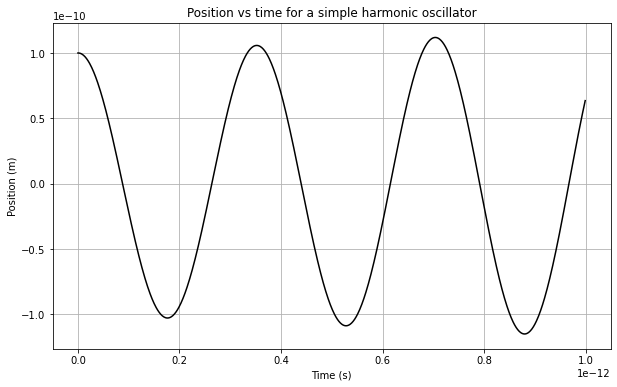

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# state constants in order to use them in the ODE
k = 12.2                                               # spring constant, unit: N/m
m = 3.82e-26                                           # mass of sodium atom, unit: kg
omega = np.sqrt(k/m)                                   # angular frequency, unit: rad/seconds

# Initial conditions
x_initial = 1e-10                                      # initial position, unit: metres
v_initial = 0                                          # initial velocity, unit: m/s
t_initial = 0                                          # start time, unit: seconds
t_final = 10e-13                                       # end time, unit: seconds
dt = 1e-15                                             # time step for Euler method, unit: seconds

# array of time points from t_initial to t_final with spacing dt
t = np.arange(t_initial, t_final, dt)

# initialize arrays for position (x) and velocity (v) values.
x = np.zeros(len(t))                                   
v = np.zeros(len(t))
x[0], v[0] = x_initial, v_initial                      # set initial position and velocity

# iterate using Euler method for numerical integration
for l in range(1, len(t)):
    x[l] = x[l-1] + dt * v[l-1]                        # update position using the previous position and velocity
    v[l] = v[l-1] - dt * omega**2 * x[l-1]             # update velocity using the previous position and velocity
    
plt.figure(figsize=(10, 6))                            # enlarge the graph

# to plot position vs time
plt.plot(t, x, "k-")
plt.title("Position vs time for a simple harmonic oscillator")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.grid()
plt.show()

### Task 2:
### Quantum harmonic oscillator: background

We can write down the Schrodinger second order ordinary differential equation as two coupled first order ODEs, using a new variable, $ \chi (x) $.


$$ \frac{d\psi}{dx} = \chi $$


$$ \frac{d\chi}{dx} = \frac{−2m}{\hbar}^2 (E - \frac{1}{2} kx^2)\psi $$


the physical constants can be evaluated in the Schrodinger’s equation, and then if all the energies are converted to units of eV and all the distances into angstroms, and finally the force constant evaluated, again
using eV and angstroms, then the equations become:


$$ \frac{d\psi}{dx} = \chi $$ and $$ \frac{d\chi}{dx} = −1.1 × 10^4 (E − 0.381  x^2)\psi $$

--------------------------------------------------------------------------------------------------------------------------
### Solve Schrodinger’s equation numerically to generate plots of the first six wave functions for the harmonic oscillator, and their probability distributions.

(a) use a fourth order runge-kutta method. define a runge-kutta function to iteratively calculate and refine the values of the wavefunction and its derivative.

(b) find a numerical solution for the wavefunction of a quantum harmonic oscillator at an estimated energy level, considering symmetry.

(c) plot the first six wave functions for the harmonic oscilator, and their probability distributions.

----------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------


**Note:**


Boundary conditions: Since there is no definite edge to the system, the outer boundary condition is that $\psi \to 0 $ as |x| $\to \infty $  

Starting at x_0 = 0, the boundary conditions above give the initial values for $\psi$ and for $\chi$.

At the centre, where x = 0, we know that the solutions can either be EVEN or ODD parity (i.e. symmetric and antisymmetric). 

**For an EVEN solution: the wavefunction must be finite at x = 0.**

we can adopt $\psi(0) = 1$ as the wavefunction is at a turning point here, the slope of the wavefunction, $\frac{d\psi}{dx} = 0 $

**For an ODD solution: the wavefunction must be zero at x = 0.**

the slope of the wavefunction is finite so we can adopt $\chi = \frac{d\psi}{dx} = 1$. 


### Task 2 (a):

I shall use a fourth order Runge-Kutta solver since this is the better method of solving ODEs numerically. This method will work as follows for our equations:
$$\psi_{i+1}=\psi_i+\frac{1}{6}\left(k_{1a}+2k_{2a}+2k_{3a}+k_{4a}\right)$$
$$\varepsilon_{i+1}=\varepsilon_i+\frac{1}{6}\left(k_{1b}+2k_{2b}+2k_{3b}+k_{4b}\right)$$
where
$$k_{1a}=h\operatorname{f_1}\left(x_i, \psi_i, \varepsilon_i\right)=\varepsilon_i$$
$$k_{2a}=h\operatorname{f_1}\left(x_i+\frac{h}{2}, \psi_i+\frac{ k_{1a}}{2}, \varepsilon_i+\frac{ k_{1b}}{2}\right)$$
$$k_{3a}=h\operatorname{f_1}\left(x_i+\frac{h}{2}, \psi_i+\frac{ k_{2a}}{2}, \varepsilon_i+\frac{ k_{2b}}{2}\right)$$
$$k_{4a}=h\operatorname{f_1}\left(x_i+h, \psi_i+ k_{3a}, \varepsilon_i+ k_{3b}\right)$$

and

$$k_{1b}=h\operatorname{f_2}\left(x_i, \psi_i, \varepsilon_i\right)=-26.2\left(E-V\right)\psi_i$$
$$k_{2b}=h\operatorname{f_2}\left(x_i+\frac{h}{2}, \psi_i+\frac{ k_{1a}}{2}, \varepsilon_i+\frac{ k_{1b}}{2}\right)$$
$$k_{3b}=h\operatorname{f_2}\left(x_i+\frac{h}{2}, \psi_i+\frac{ k_{2a}}{2}, \varepsilon_i+\frac{ k_{2b}}{2}\right)$$
$$k_{4b}=h\operatorname{f_2}\left(x_i+h, \psi_i+ k_{3a}, \varepsilon_i+ k_{3b}\right)$$.

$h$ is simply the step size, which will determine the accuracy of our solution. In my actual code, I shall define an $f_3=\left(E-V\right) f_2$ for convenience.

In [151]:
import numpy as np

def runge_kutta_step(x, psi, chi, dx, E):
    scale = 1e-4

    # Calculate the potential V for a harmonic oscillator
    V = 0.381 * x**2

    # Define the derivatives for psi and chi
    def f1(chi):
        return chi

    def f2(psi, E, V):
        return -1.1 * scale * (E - V) * psi

    # First step
    rk1_psi = f1(chi)
    rk1_chi = f2(psi, E, V)

    # Second step
    x2 = x + 0.5 * dx
    V2 = 0.381 * x2**2
    psi2 = psi + 0.5 * dx * rk1_psi
    chi2 = chi + 0.5 * dx * rk1_chi
    rk2_psi = f1(chi2)
    rk2_chi = f2(psi2, E, V2)

    # Third step
    psi3 = psi + 0.5 * dx * rk2_psi
    chi3 = chi + 0.5 * dx * rk2_chi
    rk3_psi = f1(chi3)
    rk3_chi = f2(psi3, E, V2)

    # Fourth step
    x4 = x + dx
    V4 = 0.381 * x4**2
    psi4 = psi + dx * rk3_psi
    chi4 = chi + dx * rk3_chi
    rk4_psi = f1(chi4)
    rk4_chi = f2(psi4, E, V4)

    # Combine steps
    psi += dx * (rk1_psi + 2*rk2_psi + 2*rk3_psi + rk4_psi) / 6
    chi += dx * (rk1_chi + 2*rk2_chi + 2*rk3_chi + rk4_chi) / 6

    return psi, chi


#### Summary of (a):

- The "runge_kutta_steps" function calculates the next step of the wave function of a quantum harmonic oscillator using the fourth order Runge-Kutta method. 
It takes the position (x), the wave function ($\psi$), its derivative ($\chi$), the step size (dx) and the energy (E). 



- I used Schrodinger's equation: $$ \frac{d\chi}{dx} = −1.1 × 10^4 (E − 0.381  x^2)\psi $$



- I put in the "scale" value as the results were giving an error without it.


- The function calculates four intermediate steps (rk_step1, rk_step2, rk_step3, rk_step4) for both $\psi$ and $\chi$.


- The intermediate steps refine the estimates of $\psi$ and $\chi$ at the next position, taking into account the potential of the harmonic oscillator. 


- Finally, it combines these steps to update and return the new values of $\psi$ and $\chi$, thus advancing the solution by the "dx" spatial step.


### Task 2 (b):

In [152]:
import numpy as np

def quantum_oscillator(E, x_max=10, dx=1e-3, even=True):
    
    # create a range of x values from -x_max to x_max with step dx
    x_range = np.arange(-x_max, x_max, dx)
    
    # initialise arrays to store psi and chi values
    psi_values = np.zeros(len(x_range))
    chi_values = np.zeros(len(x_range))

    # set initial conditions for psi and chi based on whether even or odd
    start_index = len(x_range) // 2
    psi_values[start_index] = 1 if even else 0
    chi_values[start_index] = 0 if even else 1

    # iterate over x_range using Runge-Kutta method to calculate wavefunction
    for i in range(start_index + 1, len(x_range)):
        psi_values[i], chi_values[i] = runge_kutta_step(x_range[i-1], psi_values[i-1], chi_values[i-1], dx, E)

    # mirror the wavefunction about x=0 for negative x values
    if even:
        for i in range(start_index - 1, -1, -1):
            psi_values[i] = psi_values[-i]
    else:
        for i in range(start_index - 1, -1, -1):
            psi_values[i] = -psi_values[-i]

    return x_range, psi_values

#### Summary of (b):

- The "quantum_oscillator" function calculates the wavefunction of a quantum harmonic oscillator for a specified energy level (E). 
The function takes four parameters: the energy (E), the maximum value of x (x_max), the step size (dx), and a boolean "even" to determine if the wavefunction should be even or odd.



- To create the x-range, establish an array of x values ranging from 0 to x_max with steps of size dx.



- The two arrays ("psi_values" and "chi_values") are initialized to store the values of the wavefunction ($\psi$) and its derivative ($\chi$). 


- The initial conditions for ($\psi$) and ($\chi$) are set based on the symmetry.

     - For even symmetry: $\psi$ is initialized with a non-zero value (1), and $\chi$ is initialized to zero. This is because the slope of an even function at the origin (x=0) is zero.
     
     - For odd symmetry: $\psi$ is initialized to zero, and $\chi$ is given a non-zero value (1) because of the non-zero slope of an odd function at the origin.



- Using the runge-kutta method implemented in the runge_kutta_steps function, integrate over each value in the x_range. The function then calculates the next step of $\psi$ and $\chi$.



- To ensure the correct symmetry of the wavefunction about x=0, the function mirrors and, if necessary, inverts the calculated psi_values.



- The x_range is extended to cover negative values of x by mirroring it about x=0.



- Finally, the function returns the extended x_range and the corresponding psi_values, representing the wavefunction of the quantum harmonic oscillator across the specified range.

### Task 2 (c)

#### Summary of (c):

Formulae used:
$$ E_n = (n + \frac{1}{2}) \hbar \omega$$



$$\hbar = \frac{6.626x10^{-34}}{ 2 \pi} $$

With an initial guess for the energy, you can incrementally advance the values for $\psi$ and $\chi$ via the Euler method in order to build up a set of values of $(\psi, x)$ for positive x. 

For plotting, the EVEN solution are identical for negative x, $\psi(x) = \psi(−x)$.


For the ODD solutions are reflected for negative x, $\psi(x) = -\psi(−x)$.
